# Group Assignment: Statistical Data Analysis
#### Group 7:
 - Aggarwal, Brahm, b3aggarw
 - Chellamuthu, Shanmuga, spchella
 - Mammadov, Rashad, r2mammad
 - Mazloomi, Rod, rmazloom
 - Sanchez, Monica, m7sanche
 - Sheikh, Hassan, h25sheik 

### Introduction

#### Research quesion

We will be exploring the following quesitons:
 - What factors are more important for national happiness? 
 - Are these factors constant over time?
 - How happiness changes over time? 

#### Data

We will use data from the World Happiness Report found in kaggle:
 - https://www.kaggle.com/unsdsn/world-happiness

The World Happiness Report is a publication of the Sustainable Development Solutions Network, that was launched in 2012 and has been published annually till 2020, excluding 2014. The Report uses data from the Gallup World Poll and ranks countries by how happy their citizens perceive themselves. The rankings are based on responses to the main life evaluation questions from nationaly representative samples, in which participants are asked to rate their lives on a 0 (worst possible life) to 10 (best possible life) scale. These rankings are stablished in comparison to Dystopia, an imaginary county with the world’s least-happy people among the main six key variables. The results from the reports have been used by goverments and organizations to make policy decisions and assess the progress and well-being of nations. 

kaggle's dataset includes data from the 2015-19 waves of the World Happiness Report. Each wave contains the national happiness score and the country ranking. Additionally, the dataset contains the contribution to happiness evaluation from each of the six main factors: levels of GDP, life expectancy, generosity, social support, freedom, and corruption. The dataset also includes a variable called ‘Dystopia residual’, that reflects the extent to which the six main factors over- or under-explain the average 2014-2016 life evaluations.  

### Data preparation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# display options
pd.options.display.float_format = "{:.3f}".format

Before importing the data, we edited the colum names in the individual csv files to ensure consistency across files. This allowed us to import only the columns of interest, i.e. the country and its region, its hapiness ranking, its hapiness score, the contribution to hapiness from each of the six main factors, and the Dystopia residual. With consistent names for variables, we were able to combine the individual csv files into a single data frame, which requiered us to create an additional variable to indicate the year to which the data refered to. As the Report measures countrys' hapiness over time, our resulting data frame is of panel type. 

In [3]:
# import the data of interest
frames = []
col_list = ['Country','Region','Happiness Rank','Happiness Score',
            'Economy (GDP per Capita)','Family','Health (Life Expectancy)',
            'Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

for year in range(2015,2020):
    df = pd.read_csv('datasets_894_813759_{:.0f}.csv'.format(year),
                     usecols=lambda col: col in set(col_list))
    df.insert(0,'Year',year)
    frames.append(df)
    
# concatenate frames
data = pd.concat(frames, sort=False)

In [4]:
# visualize the data
data.head()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,Western Europe,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2015,Iceland,Western Europe,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,2015,Denmark,Western Europe,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,2015,Norway,Western Europe,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,2015,Canada,North America,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


In [5]:
# understand the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           782 non-null    int64  
 1   Country                        782 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 782 non-null    int64  
 4   Happiness Score                782 non-null    float64
 5   Economy (GDP per Capita)       782 non-null    float64
 6   Family                         782 non-null    float64
 7   Health (Life Expectancy)       782 non-null    float64
 8   Freedom                        782 non-null    float64
 9   Trust (Government Corruption)  781 non-null    float64
 10  Generosity                     782 non-null    float64
 11  Dystopia Residual              470 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 7

Our data has 782 rows and 12 columns. All our data is of numeric type, except the country and the region which are text. Our data contains a large amount of missing values for the region and the Dystopia residual. There is also one missing value in the Trust measure. Because the region to which a country belongs is time invariant, we fill the region missing values using the avilable data.   

In [6]:
# check whether there are spelling mistakes for the country and region
for var in ('Country','Region'):
    list1 = data[var].dropna().unique()
    list1.sort()
    print('{:}_list ({:} unique vals) = {:}'.format(var,len(list1),list1))

Country_list (170 unique vals) = ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Haiti' 'Honduras' 'Hong Kong'
 'Hong Kong S.A.R., China' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran'
 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 '

In [7]:
# make countries names consistent across the dataset
data.Country.replace({'Hong Kong S.A.R., China':'Hong Kong',
                      'Trinidad & Tobago':'Trinidad and Tobago',
                      'North Cyprus':'Northern Cyprus',
                      'North Macedonia':'Macedonia',
                      'Taiwan Province of China':'Taiwan'},inplace=True)
data.Country.nunique()

165

In [8]:
# create a dictionary for region and country
dic = {}
for reg in data['Region'].dropna().unique():
    dic[reg] = data[['Region','Country']].groupby('Region').get_group(reg)['Country'].unique()

In [9]:
# fill region nan values using the dictionary
for row in range(0,len(data.Country)):
    if data.isnull().iloc[row,2]:
        for key, val in dic.items():
            for j in range(0,len(val)):
                if data.iloc[row,1] == val[j]:
                    data.iloc[row,2] = key

#check for missing values
data.Region.isna().sum()

1

After mapping the region to each specific country using the available data, we still have one missing observation for the region variable. We explore which country was not assigned a region under the mapping and input it manually besed on its geographical location.

In [10]:
# explore which countries are still missing a region
data.Country[data.Region.isna()]

119    Gambia
Name: Country, dtype: object

In [11]:
# input missing regions manually
data.Region[data.Country=='Gambia'] = 'Sub-Saharan Africa'

C:\Users\mazlooro\AppData\Local\Continuum\anaconda3\envs\rod\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


The Dystopia residual is another variable that has a large amount of missing values. We address these using the fact thatthe happiness score is equivalent to the sum of the contribution from each of the 6 major factors and that of the Dystopia residual. We check that this holds in our data and investigate whether the differences are due to reounding errors.

In [12]:
# sum the components
data['HS_sum'] = data.iloc[:,5:12].sum(axis=1,skipna=False)
                    
# compare the hapiness score and the sum of the contributions
data['HS_match'] = (round(data['HS_sum'],3)==round(data['Happiness Score'],3))

# share of true and false, when dystopia residual is not null
data.groupby('HS_match')['Dystopia Residual'].count()

HS_match
False      2
True     468
Name: Dystopia Residual, dtype: int64

There are only 2 cases for which the sum of the components does not match the happiness score, we explore those individualy.

In [13]:
data.groupby('HS_match').get_group(False).dropna()

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,HS_sum,HS_match
14,2015,United States,North America,15,7.119,1.395,1.247,0.862,0.546,0.159,0.401,2.510,7.120,False
80,2016,Azerbaijan,Central and Eastern Europe,81,5.291,1.124,0.760,0.545,0.353,0.179,0.056,2.273,5.292,False


We can see that for the 2 cases in which we didn't get a match, there is a small rounfding error between our calculation and the one in the dataset. Because these type of error are small and unfrequent, we feel condifent about replacing the missing values for the Dystopia Residual as the difference between the Happiness Score and the 6 core factors contributing to happiness.

In [14]:
# calculate missing values for the Dystopia residual
data['Dystopia Residual'][data['Dystopia Residual'].isna()] = data['Happiness Score'] - data.iloc[:,5:11].sum(axis=1,skipna=False)
data.drop(['HS_sum','HS_match'], axis=1, inplace=True)
data.isna().sum()

C:\Users\mazlooro\AppData\Local\Continuum\anaconda3\envs\rod\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Year                             0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
Dystopia Residual                1
dtype: int64

In [15]:
# explore the remaining missing values
data[data.isnull().any(axis=1)]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
19,2018,United Arab Emirates,Middle East and Northern Africa,20,6.774,2.096,0.776,0.670,0.284,nan,0.186,nan


The two remaining missing values in our dataset correspond to the same observation. Because we can not solve for missing values with the available information, we will exclude the observation from the analysis.

In [16]:
# drop the observation from the dataset
data.dropna(inplace=True)

### Data analysis

#### Data exploration
Before we deep down into our research question, we explore the data by calculating descriptive statistics for the variables of interest (i.e. happiness score and the six main factors contributing to national happiness), exploring the correlation among these variables and understanding their distributions.

In [17]:
# summary statistics of the variables of interes 
data.iloc[:,4:11].describe()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,5.377,0.915,1.079,0.612,0.411,0.125,0.219
std,1.127,0.405,0.330,0.248,0.153,0.106,0.122
min,2.693,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.509,0.605,0.870,0.440,0.310,0.054,0.130
50%,5.321,0.982,1.125,0.647,0.431,0.091,0.202
75%,6.182,1.234,1.328,0.808,0.531,0.156,0.279
max,7.769,1.871,1.644,1.141,0.724,0.552,0.838


The table above shows the descriptive statistics of the variables of interest across time and geographies. The table shows that the mean happiness score across countries during the period of 2014-2019 was 5.377 with a standard deviation of 1.127. The lowest and highest happiness score recorded across all reports were 2.693 and 7.769, respectively. 

The table shows that, on average, economic prosperity, social support and life expectancy are more important for national happiness than freedom, generosity and low corruption. Overall, social support contributes the most to national happiness and low corruption contributes the least. However, the table also suggests that respondents agree less on the contribution from each of the three main contributing factors as compared to the contribution from other three factors, as indicated by their standard deviations. While each of the six main factors recorded a minimum contribution of zero, the maximum contribution from each factor ranged from 0.552 for low corruption to 1.871 for economic prosperity.

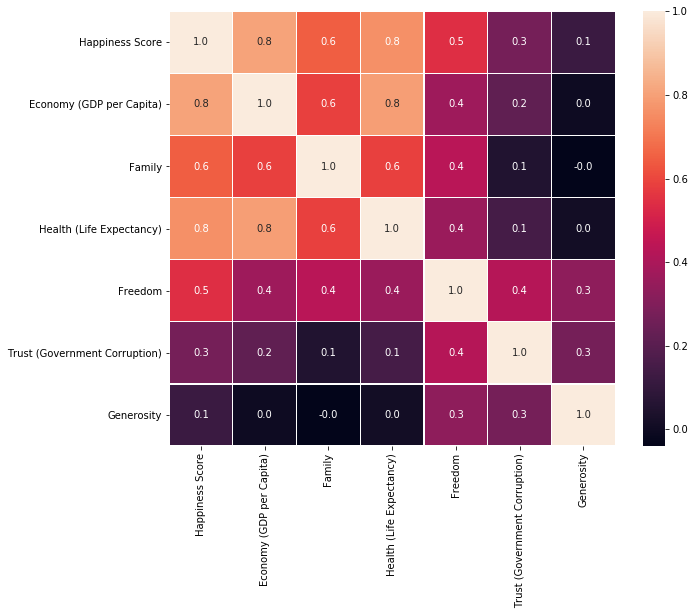

In [18]:
# correlations among variables of interest
corr_matrix = data.iloc[:,4:11].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", linewidths=0.3)

The table above shows the correlation coefficients between the variables of interest across time and geographies. The table shows that happiness score is positively and strongly correlated with economic prosperity, life expectancy and social support. On the other hand, the correlation of happiness score with freedom, low corruption and generosity is positive and weak. The table also shows that higher economic prosperity is correlated with higher levels of life expectancy and, to a lesser extent, higher levels of social support, freedom and trust. From the table, we conclude that any pair of our variables of interest is positively correlated, except for the relationship between social support and generosity; which correlation coefficient suggest independence between these two variables.

We further explore the correlation between these variables by visualizing the relationship among each pair of variables and the distribution of the happiness score.

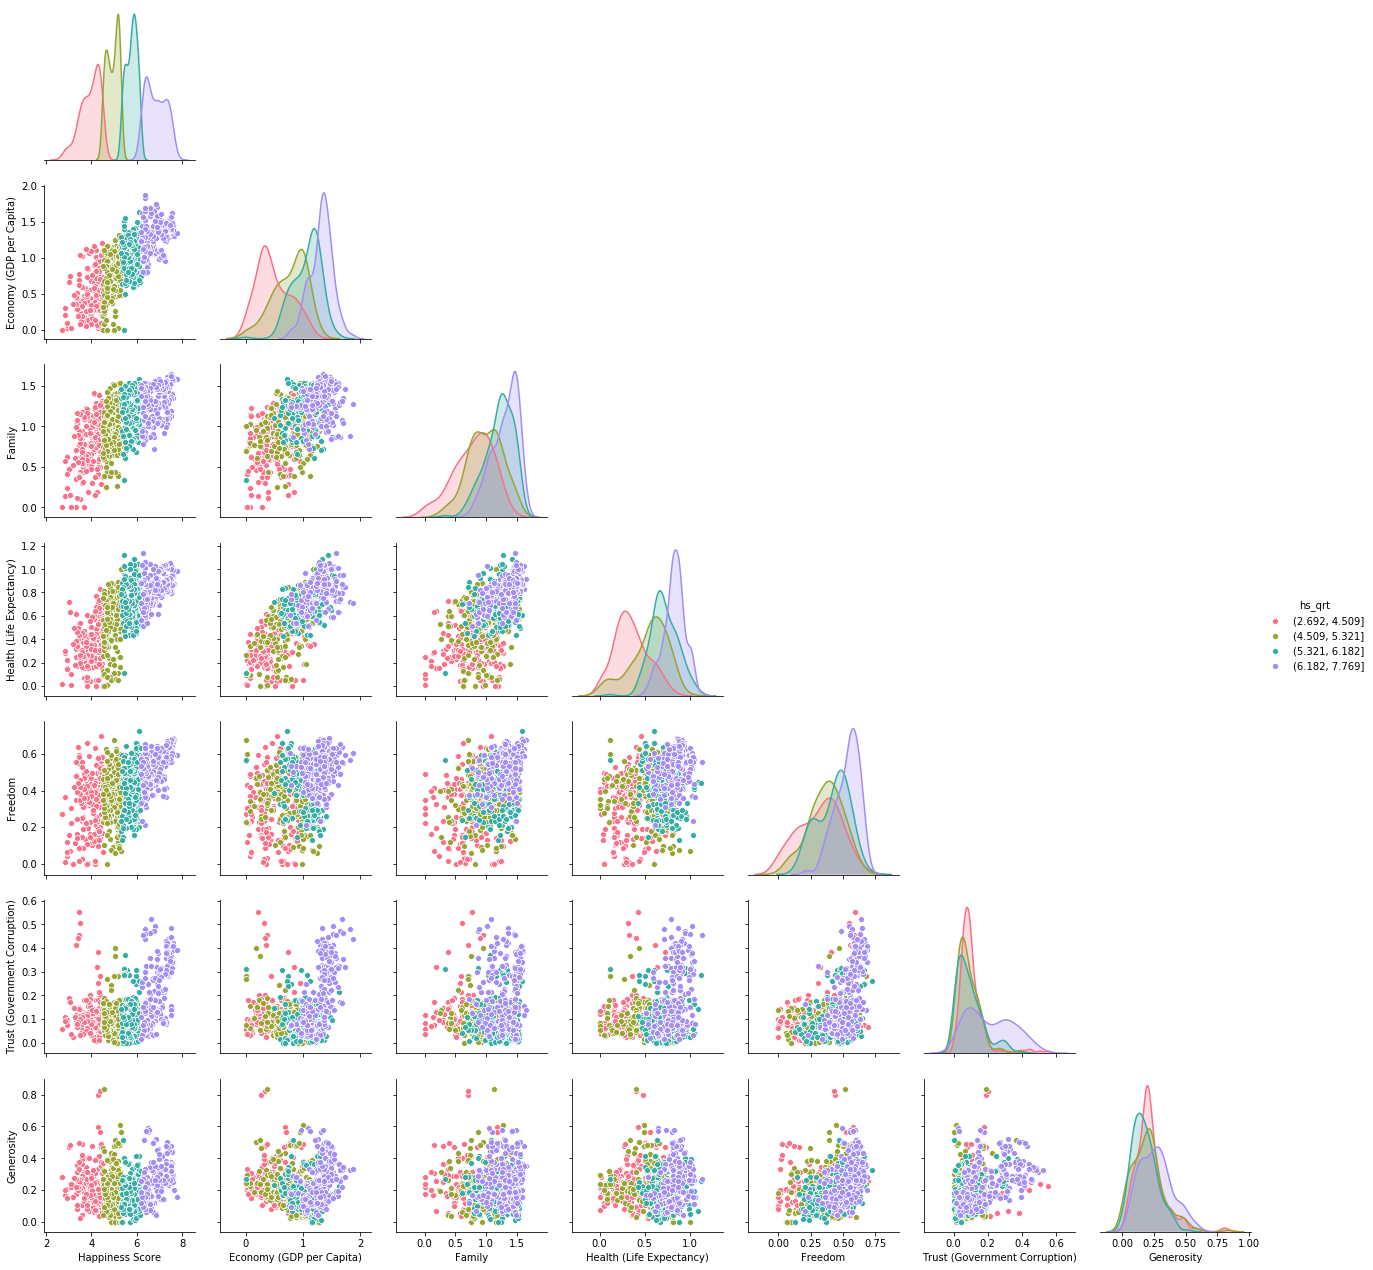

In [19]:
# define the happiness score quartile of each observation
data['hs_qrt'] = pd.qcut(data['Happiness Score'],4)

#pair plot for the variables of interest
sns.pairplot(data=data, hue='hs_qrt', vars=data.iloc[:,4:11], palette="husl", corner=True)

The chart above shows the relationship between each pair of the variables of interest by the quartile of the happiness score across time and geographies. From the chart, we can see that the relationship between happiness score and all factors, except trust and generosity, is linear with countries reporting higher contributions from each factor also registering higher happiness scores. The graph also shows a linear relationship between economic prosperity and social support, economic prosperity and life expectancy, and social support and life expectancy. The relationship of trust with each other factor contributing to the happiness score seems to be exponential. With countries in the lower quartile in the happiness score typically reporting low levels for both variables (i.e. trust and any other factor) while countries in the top quartile in the happiness score reporting low and high levels of trust. The relationship between the remaining pairs of variables is not clear. 

The last row of scatter plots shows three outilers that report higher contribution from the generosity factor. We explore these outliers in further detail.   

In [20]:
# identify outliers
data[data['Generosity']>0.7]

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,hs_qrt
128,2015,Myanmar,Southeastern Asia,129,4.307,0.271,0.709,0.482,0.440,0.190,0.796,1.418,"(2.692, 4.509]"
118,2016,Myanmar,Southeastern Asia,119,4.395,0.341,0.700,0.399,0.427,0.202,0.820,1.507,"(2.692, 4.509]"
113,2017,Myanmar,Southeastern Asia,114,4.545,0.367,1.123,0.398,0.514,0.189,0.838,1.115,"(4.509, 5.321]"


The table above shows the observations for which the contribution to the happiness score from the generosity factor exceeds 0.7. We can see that the outliers identified on the scatter plot correspond to Myanmar, a country located in Southeastern Asia where social supoport and generosity were highly important for happiness in the 2015-17 period. 

##### Time dimension

In [21]:
# summary statistics of main factor by report date
for col in data.iloc[:,4:].columns:
    print('\033[1m Summary statistics: \033[0m'+ col)
    display(data.groupby('Year')[col].describe())

 Summary statistics: Happiness Score


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,5.376,1.145,2.839,4.526,5.232,6.244,7.587
2016,157.000,5.382,1.142,2.905,4.404,5.314,6.269,7.526
2017,155.000,5.354,1.131,2.693,4.506,5.279,6.102,7.537
2018,155.000,5.367,1.117,2.905,4.452,5.358,6.154,7.632
2019,156.000,5.407,1.113,2.853,4.545,5.380,6.184,7.769


 Summary statistics: Economy (GDP per Capita)


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.846,0.403,0.000,0.546,0.910,1.158,1.690
2016,157.000,0.954,0.413,0.000,0.670,1.028,1.280,1.824
2017,155.000,0.985,0.421,0.000,0.663,1.065,1.318,1.871
2018,155.000,0.884,0.381,0.000,0.613,0.940,1.192,1.649
2019,156.000,0.905,0.398,0.000,0.603,0.960,1.232,1.684


 Summary statistics: Family


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.991,0.272,0.000,0.857,1.030,1.214,1.402
2016,157.000,0.794,0.267,0.000,0.642,0.841,1.022,1.183
2017,155.000,1.189,0.287,0.000,1.043,1.254,1.414,1.611
2018,155.000,1.216,0.301,0.000,1.075,1.258,1.464,1.644
2019,156.000,1.209,0.299,0.000,1.056,1.272,1.452,1.624


 Summary statistics: Health (Life Expectancy)


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.630,0.247,0.000,0.439,0.697,0.811,1.025
2016,157.000,0.558,0.229,0.000,0.383,0.597,0.730,0.953
2017,155.000,0.551,0.237,0.000,0.370,0.606,0.723,0.949
2018,155.000,0.597,0.248,0.000,0.420,0.643,0.778,1.030
2019,156.000,0.725,0.242,0.000,0.548,0.789,0.882,1.141


 Summary statistics: Freedom


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.429,0.151,0.000,0.328,0.436,0.549,0.670
2016,157.000,0.371,0.146,0.000,0.257,0.397,0.485,0.608
2017,155.000,0.409,0.150,0.000,0.304,0.437,0.517,0.658
2018,155.000,0.456,0.162,0.000,0.358,0.493,0.579,0.724
2019,156.000,0.393,0.143,0.000,0.308,0.417,0.507,0.631


 Summary statistics: Trust (Government Corruption)


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.143,0.120,0.000,0.062,0.107,0.180,0.552
2016,157.000,0.138,0.111,0.000,0.061,0.105,0.176,0.505
2017,155.000,0.123,0.102,0.000,0.057,0.090,0.153,0.464
2018,155.000,0.112,0.096,0.000,0.051,0.082,0.137,0.457
2019,156.000,0.111,0.095,0.000,0.047,0.085,0.141,0.453


 Summary statistics: Generosity


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,0.237,0.127,0.000,0.151,0.216,0.310,0.796
2016,157.000,0.243,0.134,0.000,0.155,0.222,0.312,0.820
2017,155.000,0.247,0.135,0.000,0.154,0.232,0.324,0.838
2018,155.000,0.181,0.099,0.000,0.109,0.173,0.240,0.598
2019,156.000,0.185,0.095,0.000,0.109,0.177,0.248,0.566


 Summary statistics: Dystopia Residual


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.000,2.099,0.554,0.329,1.759,2.095,2.462,3.602
2016,157.000,2.326,0.542,0.818,2.032,2.291,2.665,3.838
2017,155.000,1.850,0.500,0.378,1.591,1.833,2.145,3.117
2018,155.000,1.922,0.517,0.291,1.631,1.906,2.279,2.961
2019,156.000,1.880,0.529,0.184,1.513,1.916,2.268,3.050


 Summary statistics: hs_qrt


,count,unique,top,freq
Year,,,,
2015,158,4,"(4.509, 5.321]",46
2016,157,4,"(2.692, 4.509]",43
2017,155,4,"(4.509, 5.321]",41
2018,155,4,"(5.321, 6.182]",43
2019,156,4,"(5.321, 6.182]",42


The tables above show the descriptive statistics for each of the variables of interest by report date. We can see, that the mean and the standard deviation of the happiness score has not changed much across the years, suggesting that the distribution of happiness do not change much. We can see that the average happiness score increased slightly from 2015 to 2016, it decreased a tad in 2017 and increased steadily till 2019. 

The descriptive statistics for the main factors contributing to happiness indicate that, on average, economic performance, social support and life expectancy are more important to national happiness than freedom, generosity, and low levels of corruption. However, there also seem to be more disagreement among respondents from different countries regarding the importance of the three main contributing factors to national happiness, as indicated by a larger standard deviation compared to that of the remaining three factors. While the average contribution for the three main contributing factors seems to have increased slightly over the years, the tables suggest that the relative importance from each of the factors to happiness changes very slowly with time.

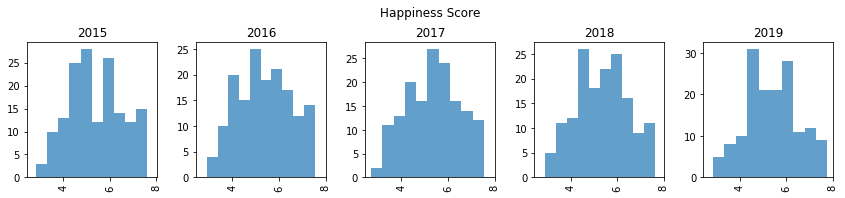

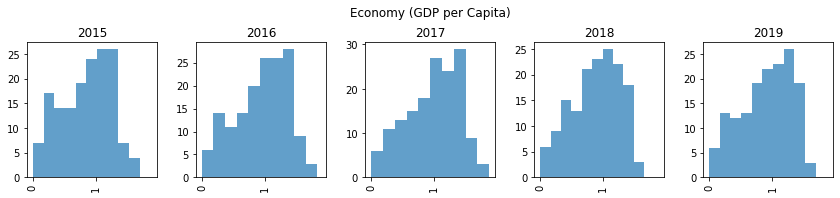

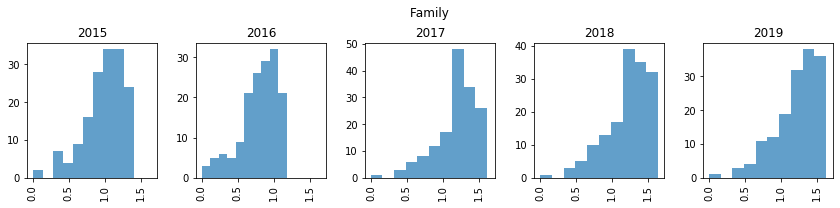

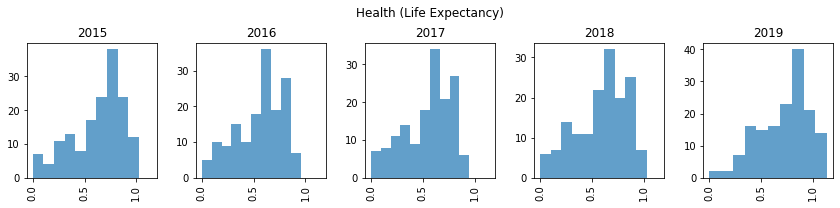

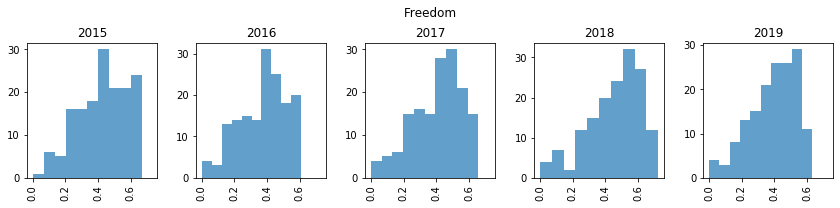

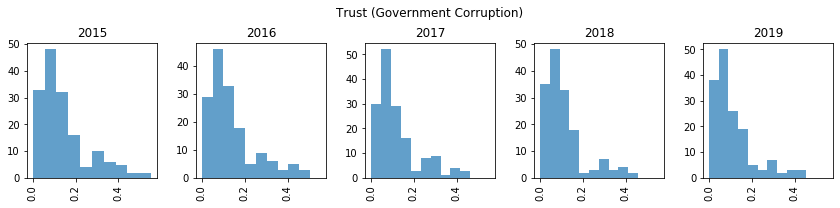

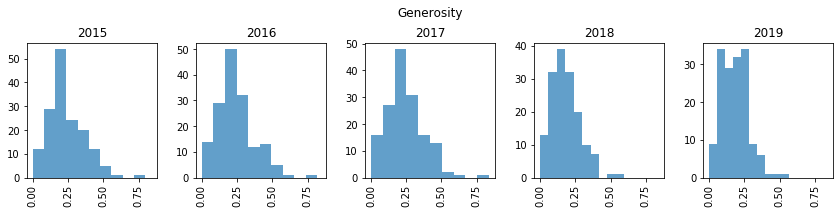

In [22]:
# plot the distribution of each factor by report date
for col in data.iloc[:,4:11].columns:
    data[col].hist(by=data['Year'],layout=(1,5),figsize=(14,2.5), sharex=True, alpha=0.7)
    plt.suptitle(col,y=1.1)

The graphs above show the distribution of each of the variables on interest by report date. We can see that the distribution of each variable remains largely constant across time, which confirms the impression we had from the descriptive statistics tables. The histograms suggest that the distribution for the happiness score and those for the contribution from the generosity factor and the residual are normal. While the distributions of the contribution from economic performance, social support, life expectancy and freedom are left skewed, that of the contribution from low corruption is right skewed.

##### Geography dimension

In [23]:
# summary statistics of main factor by report date
for col in data.iloc[:,4:].columns:
    print('\033[1m Summary statistics: \033[0m'+ col)
    display(data.groupby('Region')[col].describe())

 Summary statistics: Happiness Score


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,7.295,0.031,7.228,7.284,7.296,7.314,7.334
Central and Eastern Europe,145.000,5.428,0.585,4.096,5.129,5.488,5.848,6.852
Eastern Asia,30.000,5.652,0.479,4.874,5.253,5.655,5.921,6.446
Latin America and Caribbean,111.000,6.024,0.721,3.582,5.748,6.125,6.465,7.226
Middle East and Northern Africa,95.000,5.322,1.017,3.006,4.694,5.254,6.208,7.278
North America,10.000,7.175,0.204,6.886,7.021,7.198,7.325,7.427
Southeastern Asia,44.000,5.335,0.802,3.819,4.772,5.271,6.024,6.798
Southern Asia,35.000,4.581,0.588,3.203,4.341,4.565,5.047,5.653
Sub-Saharan Africa,196.000,4.190,0.598,2.693,3.775,4.207,4.562,5.891


 Summary statistics: Economy (GDP per Capita)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,1.356,0.074,1.250,1.311,1.350,1.397,1.484
Central and Eastern Europe,145.000,1.018,0.222,0.390,0.886,1.065,1.185,1.353
Eastern Asia,30.000,1.238,0.206,0.828,1.028,1.297,1.394,1.552
Latin America and Caribbean,111.000,0.942,0.217,0.267,0.815,0.981,1.093,1.361
Middle East and Northern Africa,95.000,1.092,0.328,0.287,0.883,1.053,1.349,1.871
North America,10.000,1.422,0.074,1.326,1.372,1.416,1.469,1.546
Southeastern Asia,44.000,0.893,0.348,0.271,0.682,0.810,1.098,1.692
Southern Asia,35.000,0.639,0.204,0.320,0.446,0.652,0.794,1.010
Sub-Saharan Africa,196.000,0.448,0.296,0.000,0.258,0.376,0.607,1.198


 Summary statistics: Family


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,1.424,0.182,1.105,1.312,1.529,1.555,1.601
Central and Eastern Europe,145.000,1.172,0.289,0.192,1.002,1.227,1.434,1.584
Eastern Asia,30.000,1.199,0.222,0.722,1.064,1.212,1.410,1.531
Latin America and Caribbean,111.000,1.187,0.243,0.296,1.023,1.236,1.402,1.522
Middle East and Northern Africa,95.000,0.996,0.306,0.149,0.809,1.039,1.253,1.559
North America,10.000,1.358,0.174,1.048,1.266,1.438,1.479,1.532
Southeastern Asia,44.000,1.094,0.250,0.537,0.904,1.123,1.279,1.463
Southern Asia,35.000,0.804,0.364,0.110,0.527,0.810,1.142,1.340
Sub-Saharan Africa,196.000,0.846,0.301,0.000,0.663,0.886,1.068,1.410


 Summary statistics: Health (Life Expectancy)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,0.903,0.077,0.817,0.846,0.892,0.926,1.036
Central and Eastern Europe,145.000,0.697,0.103,0.438,0.631,0.701,0.764,0.953
Eastern Asia,30.000,0.863,0.155,0.555,0.794,0.897,0.963,1.122
Latin America and Caribbean,111.000,0.676,0.135,0.275,0.596,0.687,0.777,0.963
Middle East and Northern Africa,95.000,0.666,0.129,0.310,0.597,0.660,0.748,1.029
North America,10.000,0.861,0.077,0.774,0.821,0.848,0.890,1.039
Southeastern Asia,44.000,0.635,0.184,0.383,0.490,0.630,0.711,1.141
Southern Asia,35.000,0.513,0.143,0.173,0.453,0.527,0.595,0.831
Sub-Saharan Africa,196.000,0.284,0.153,0.000,0.181,0.290,0.376,0.798


 Summary statistics: Freedom


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,0.611,0.039,0.557,0.582,0.608,0.645,0.669
Central and Eastern Europe,145.000,0.352,0.130,0.092,0.259,0.346,0.437,0.724
Eastern Asia,30.000,0.418,0.107,0.159,0.353,0.438,0.495,0.597
Latin America and Caribbean,111.000,0.464,0.125,0.025,0.432,0.489,0.543,0.634
Middle East and Northern Africa,95.000,0.349,0.156,0.000,0.241,0.324,0.463,0.654
North America,10.000,0.559,0.065,0.454,0.516,0.560,0.604,0.653
Southeastern Asia,44.000,0.544,0.078,0.356,0.505,0.553,0.595,0.696
Southern Asia,35.000,0.393,0.160,0.000,0.324,0.440,0.517,0.585
Sub-Saharan Africa,196.000,0.354,0.140,0.000,0.290,0.380,0.448,0.674


 Summary statistics: Trust (Government Corruption)


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,0.357,0.051,0.290,0.307,0.368,0.387,0.429
Central and Eastern Europe,145.000,0.076,0.081,0.000,0.024,0.041,0.111,0.383
Eastern Asia,30.000,0.118,0.100,0.023,0.041,0.078,0.160,0.371
Latin America and Caribbean,111.000,0.092,0.047,0.009,0.060,0.086,0.116,0.246
Middle East and Northern Africa,95.000,0.145,0.098,0.027,0.083,0.114,0.160,0.522
North America,10.000,0.223,0.088,0.128,0.139,0.223,0.304,0.330
Southeastern Asia,44.000,0.136,0.135,0.000,0.052,0.095,0.175,0.492
Southern Asia,35.000,0.100,0.039,0.025,0.073,0.092,0.126,0.173
Sub-Saharan Africa,196.000,0.106,0.083,0.025,0.060,0.085,0.117,0.552


 Summary statistics: Generosity


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,0.424,0.070,0.330,0.362,0.455,0.477,0.500
Central and Eastern Europe,145.000,0.157,0.088,0.002,0.087,0.144,0.210,0.429
Eastern Asia,30.000,0.200,0.112,0.029,0.103,0.197,0.257,0.401
Latin America and Caribbean,111.000,0.185,0.093,0.043,0.114,0.175,0.231,0.489
Middle East and Northern Africa,95.000,0.178,0.112,0.026,0.095,0.148,0.256,0.494
North America,10.000,0.372,0.071,0.280,0.299,0.397,0.429,0.458
Southeastern Asia,44.000,0.384,0.183,0.117,0.251,0.352,0.502,0.838
Southern Asia,35.000,0.301,0.104,0.153,0.214,0.307,0.368,0.491
Sub-Saharan Africa,196.000,0.208,0.080,0.025,0.168,0.206,0.245,0.515


 Summary statistics: Dystopia Residual


,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Australia and New Zealand,10.000,2.218,0.172,2.046,2.101,2.147,2.266,2.546
Central and Eastern Europe,145.000,1.955,0.448,0.814,1.677,1.917,2.246,3.380
Eastern Asia,30.000,1.616,0.554,0.555,1.370,1.636,2.028,2.615
Latin America and Caribbean,111.000,2.477,0.510,1.213,2.167,2.510,2.837,3.602
Middle East and Northern Africa,95.000,1.896,0.517,0.329,1.588,1.854,2.212,3.409
North America,10.000,2.379,0.208,2.187,2.220,2.285,2.496,2.728
Southeastern Asia,44.000,1.649,0.480,0.651,1.368,1.622,2.011,2.580
Southern Asia,35.000,1.831,0.728,0.419,1.379,1.829,2.236,3.183
Sub-Saharan Africa,196.000,1.945,0.579,0.184,1.638,1.943,2.312,3.838


 Summary statistics: hs_qrt


,count,unique,top,freq
Region,,,,
Australia and New Zealand,10,1,"(6.182, 7.769]",10
Central and Eastern Europe,145,4,"(5.321, 6.182]",78
Eastern Asia,30,3,"(5.321, 6.182]",15
Latin America and Caribbean,111,4,"(6.182, 7.769]",49
Middle East and Northern Africa,95,4,"(4.509, 5.321]",32
North America,10,1,"(6.182, 7.769]",10
Southeastern Asia,44,4,"(4.509, 5.321]",16
Southern Asia,35,3,"(4.509, 5.321]",17
Sub-Saharan Africa,196,3,"(2.692, 4.509]",136


The tables above show the descriptive statistics for each variable of interest by region. As expected, the sample size changes by regions, as more or less countries fall into the defined geographical boundaries. Because the sample sime for some regions (e.g. Australia and New Zealand, North America and Eastern Asia) is small, the analysis by region may suffer from sample size bias. Overall, the descriptive statistics indicate more variation in the average happiness score and the average contribution from each of the six main factors by region, compared to the time dimension. 

#### Predictive model

In this section, we use a linear regression model to estimate the happiness score based on the contribution from the each of the six variables. 

In [54]:
# Initialize the regression model
y = data['Happiness Score']
x = data.iloc[:,5:11]
x = sm.add_constant(x)

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     417.0
Date:                Sat, 08 Aug 2020   Prob (F-statistic):          1.42e-238
Time:                        18:34:54   Log-Likelihood:                -637.71
No. Observations:                 781   AIC:                             1289.
Df Residuals:                     774   BIC:                             1322.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             2.1751      0.080     27.219      0.000       2.018       2.332
Economy (GDP per Capita)          1.1360      0.084     13.500      0.000       0.971       1.301
Family                            0.6459      0.081      7.982      0.000       0.487       0.805
Health (Life Expectancy)          1.0127      0.132      7.671      0.000       0.754       1.272
Freedom                           1.4813      0.163      9.062      0.000       1.160       1.802
Trust (Government Corruption)     0.8582      0.223      3.841      0.000       0.420       1.297
Generosity                        0.5924      0.176      3.372      0.001       0.248       0.937
==============================================================================
Omnibus:                       16.196   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.249
Skew:                          -0.285   Prob(JB):                     0.000109
Kurtosis:                       3.486   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Results from the OLS model show that all factors are significant predictors of the happiness score of a country (p-values below 0.05). The results show that when the contribution from all factors is zero, the average happiness score is 2.18. The table also suggests that policies that improve freedom and economic prosperity are the most effective for increasing national happiness. In particular, every additional point in the contribution of freedom and GDP per capita increases the happiness score by 1.48 and 1.14, respectively. At the lower end are generosity and social support, with every additional point in the contribution from these factors leading to a 0.59 and 0.65 increase in the happiness score. The R-squared of the model suggest that the estimated coefficients predict 76.4% of the time the actual happiness score. 

We now explore if the region or the year are predictors of the happiness score.

In [25]:
# include a dummy for each year
year = pd.get_dummies(data['Year'],drop_first=True)
x1 = pd.concat([x,year],axis=1)

model = sm.OLS(y,x1)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     285.8
Date:                Sat, 08 Aug 2020   Prob (F-statistic):          2.49e-251
Time:                        14:56:19   Log-Likelihood:                -595.84
No. Observations:                 781   AIC:                             1214.
Df Residuals:                     770   BIC:                             1265.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             1.9752      0.089     22.234      0.000       1.801       2.150
Economy (GDP per Capita)          0.8277      0.096      8.607      0.000       0.639       1.016
Family                            1.1834      0.096     12.307      0.000       0.995       1.372
Health (Life Expectancy)          1.1123      0.145      7.675      0.000       0.828       1.397
Freedom                           1.4334      0.159      9.024      0.000       1.122       1.745
Trust (Government Corruption)     0.8427      0.213      3.956      0.000       0.425       1.261
Generosity                        0.3839      0.174      2.205      0.028       0.042       0.726
2016                              0.3171      0.066      4.826      0.000       0.188       0.446
2017                             -0.2409      0.065     -3.678      0.000      -0.370      -0.112
2018                             -0.2597      0.064     -4.080      0.000      -0.385      -0.135
2019                             -0.2814      0.063     -4.435      0.000      -0.406      -0.157
==============================================================================
Omnibus:                       18.271   Durbin-Watson:                   1.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.222
Skew:                          -0.318   Prob(JB):                     4.06e-05
Kurtosis:                       3.465   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table above shows the OLS results for the relationship between the happiness score and the six main factors including a dummy variable for each of the years, except that of 2015 which is captured in the model's constant. The results show that including the dummy variables for each year improves the predictive power of the model, as suggested by a slightly higher R-squared. The constant of the model indicates the average level of happiness in 2015 if the contribution from all six factors is zero. Results from the model show that the level of happiness in 2016 was significantly higher than in 2015, while the happiness score in 2017, 2018 and 2019 was significantly lower from that of 2015. The model also shows that, after controlling for the year of the report, freedom and generosity continue to be leading and lagging factors to improve happiness score, respectively.

In [26]:
# include a dummy for each geography
year = pd.get_dummies(data['Region'],drop_first=True)
x2 = pd.concat([x1,year],axis=1)

model = sm.OLS(y,x2)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     192.5
Date:                Sat, 08 Aug 2020   Prob (F-statistic):          3.61e-275
Time:                        14:56:19   Log-Likelihood:                -514.28
No. Observations:                 781   AIC:                             1069.
Df Residuals:                     761   BIC:                             1162.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               3.0530      0.235     12.966      0.000       2.591       3.515
Economy (GDP per Capita)            0.9133      0.093      9.790      0.000       0.730       1.096
Family                              0.9519      0.093     10.214      0.000       0.769       1.135
Health (Life Expectancy)            0.4924      0.178      2.771      0.006       0.144       0.841
Freedom                             1.2997      0.154      8.427      0.000       0.997       1.603
Trust (Government Corruption)       0.7654      0.210      3.650      0.000       0.354       1.177
Generosity                          0.5361      0.180      2.985      0.003       0.184       0.889
2016                                0.1984      0.061      3.237      0.001       0.078       0.319
2017                               -0.2659      0.060     -4.443      0.000      -0.383      -0.148
2018                               -0.2245      0.059     -3.832      0.000      -0.339      -0.109
2019                               -0.1740      0.060     -2.912      0.004      -0.291      -0.057
Central and Eastern Europe         -0.5210      0.170     -3.059      0.002      -0.855      -0.187
Eastern Asia                       -0.7458      0.182     -4.101      0.000      -1.103      -0.389
Latin America and Caribbean        -0.0384      0.171     -0.224      0.823      -0.375       0.298
Middle East and Northern Africa    -0.5734      0.171     -3.347      0.001      -0.910      -0.237
North America                       0.1025      0.214      0.479      0.632      -0.317       0.522
Southeastern Asia                  -0.8152      0.177     -4.618      0.000      -1.162      -0.469
Southern Asia                      -0.7291      0.188     -3.873      0.000      -1.099      -0.360
Sub-Saharan Africa                 -0.7743      0.188     -4.109      0.000      -1.144      -0.404
Western Europe                     -0.1690      0.160     -1.054      0.292      -0.484       0.146
==============================================================================
Omnibus:                       17.743   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.037
Skew:                          -0.237   Prob(JB):                     6.03e-06
Kurtosis:                       3.717   Cond. No.                         63.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The table above shows that the predictive power of the model increases when we additionally control for the region. The R-squared of the model that controls for the report's year and the region is 0.828. The constant of the model shows the average happiness score of Australia and New Zealand in 2015 when the contribution from all six factors is zero. Results from the model show that the estimated coefficients for the six happiness factors and the year of the report are statistically significant at the 5% level (p-values below 0.05). The estimated coefficients for the regions, suggest that Australia and New Zealand are happier than countries in all other regions, expect -maybe- in North America. However, because the p-value of the North America coefficient is larger than 0.1, we can not say with 90% confidence that the happiness score in North America is higher than that in Australia and New Zealand. The estimated coefficients suggest that Asia and Sub-Saharan Africa are the least happy regions.

We now explore the predictive power of the model and the residuals.

In [27]:
# predict happiness score
x2['hs_hat'] = model.fit().predict(x2)

# calculate the residuals
x2['res'] = x2.hs_hat - data['Happiness Score']

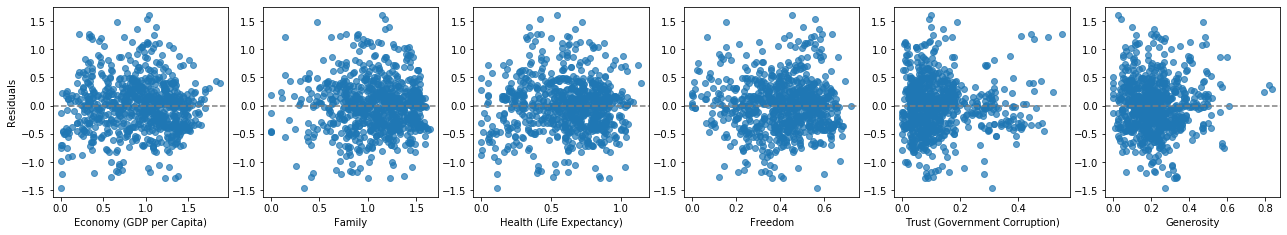

In [28]:
# plot the relathionship between the residuals and each main factor
fig, axes = plt.subplots(1,6,figsize=(22,3.5),sharey=True)

for i in range(1,7):
    plt.subplot('16'+str(i))
    plt.plot(x2.iloc[:,i], x2.res, 'o', alpha=0.7)
    plt.axhline(y = 0, linestyle = '--', color = 'grey')
    plt.xlabel(x2.columns.values.tolist()[i])
    plt.ylabel('Residuals' if i==1 else '')

The charts above show the relationship between the residuals of the model and the six main variables of interest. The charts show that there is no obvious trend in the main clouds of points. while the generosity charts show the outliers of the model, they do not seem to have a large impact as they are close to the zero line.

### Conclusion